# Gaussian Mixture Models Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We can use Gaussian Mixture Models (GMM), another clustering algorithm, to address these limitations.  

## Problem definition

In a *Gaussian mixture model*, we define each sample $i = 1, 2, \cdots, m$ with features of $j = 1, 2, \cdots, n$ belong to clusters $c = 1, 2, \cdots, k$, where each cluster $c^{(i)}$ has a mean of $\mu^{(c)}$ and $\Sigma^{(c)}$.  Combining these two parameters give us the multivariate gaussian distribution $\mathcal{N}(\mathbf{x} | \mathbf{\mu}^{(c)}, \Sigma^{(c)})$ where 

$$\mathcal{N} (\mathbf{x} | \mathbf{\mu}^{(c)}, \Sigma^{(c)})= \frac{1}{(2\pi)^\frac{n}{2}\lvert{\Sigma^{(c)}}\rvert^\frac{1}{2}}e^{(-\frac{1}{2}(\mathbf{x} -\mathbf{\mu}^{(c)})^T\Sigma^{(c)-1}(\mathbf{x} - \mathbf{\mu}^{(c)}))}$$

For those who are confused, you may compare it with univariate gaussian distribution and you will realize they are the same but for multiple dimensions:

$$\frac{1}{\sqrt{2\pi}\sigma}e ^{-\frac{1}{2}\frac{(x-\mu)^{2}}{\sigma^{2}}}$$

Note that the determinant of the covariance matrix is the product of its diagonal entries and each diagonal entry is the variance, thus is the same.

<img src = "figures/em2.png" height=400>

We shall also further define $\pi^{(c)}$, which is simply the probability of being in the cluster (think of it as $p(y)$).  Since $\pi$ is the probability of each cluster, it should sum to 1.

$$\quad 0 \leq \pi^{(c)} \leq 1 \quad ; \quad \sum\limits_{c=1}^k \pi^{(c)}=1$$

Then, using **Baye's theorem**, we can define the likelihood of a sample $\mathbf{x}^{(i)}$ belong to a cluster $c$ as simply:

$$p(y|x) = p(y) * p(x | y)$$
$$p(c | \mathbf{x}^{(i)}) = \pi^{(c)} * \mathcal{N} (\mathbf{x}^{(i)} | \mathbf{\mu}^{(c)}, \Sigma^{(c)}) $$

Finally, based on all the information, GMM defines its objective, i.e., to maximize

$$\prod \limits_{i=1}^m \sum_{c=1}^k \pi^{(c)} \mathcal{N} (\mathbf{x}^{(i)} | \mathbf{\mu}^{(c)}, \Sigma^{(c)})$$

## Derivatives

Our objective function is to find $\theta$ that maximize the log-likehood $\mathcal{L}$.  (Here we apply $\log$ for mathematical stability.)

$$\max_\theta \sum\limits_{i=1}^m \log \sum\limits_{c=1}^k \pi^{(c)} \mathcal{N}(\mathbf{x} | \mu^{(c)}, \Sigma^{(c)})$$

Our "normal" procedure would be to compute the gradient $\frac{d\mathcal{L}}{d\theta}$ and set it to 0.  however, if you try this yourself at home, you will find that it is not possible to find the closed form.

### Responsibilities $r$

Before anything, let us introduce a quantity that will play a central role in this algorithm: **responsibilities**.  We define the quantity

$$ r^{(i)}_{c} = \frac{\pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}$$ 

$r^{(i)}_{c}$ basically gives us $$ \frac{\text{Probability of $\mathbf{x}^{(i)}$ belonging to cluster c}}{\text{Probability of $\mathbf{x}^{(i)}$ over all clusters}} $$

Note that $r$ for a sample $i$ 

$$r^{(i)} = r^{(i)}_1, r^{(i)}_2, \cdots, r^{(i)}_k \in \mathbb{R}^k$$

$$\sum\limits_{c=1}^{k}r^{(i)}_c = 1$$

$$ r^{(i)}_c \geq 0 $$

### EM algorithm

Notice that $r$ actually depends on **mean, covariance and pi**.  But then, **mean, covariance, and pi** also depends on $r$.  Based on this, we can use EM algorithm, where we can (1) create a random mean, covariance, and pi, (2) calculate $r$, and then repeat 1 and 2 until certain stopping criteria.

### Total responsibility $N^{(c)}$

By summing all the total responsibility of the $c$ th cluster along all samples, we get $N^{(c)}$.

$$N_c = \sum\limits_{i=1}^{m}r^{(i)}_c \in \mathbb{R}^k $$

Note that this value does not necessarily sum to 1.

### Updating the mean

The update of the mean $\mu^{(c)}$ is given by:

$$ \mu_\text{new}^{(c)} = \frac{\sum\limits_{i=1}^{m}r^{(i)}_{c}\mathbf{x}^{(i)}}{\sum\limits_{i=1}^{m}r^{(i)}_{c}}$$

**Proof:**

We take a partial derivative of our objective function with respect to the mean parameters $\mu^{(c)}$. To simplify things, let's perform partial derivative without the log first and only consider one sample.

$$
	\frac{\partial p(\mathbf{x}^{(i)} | \theta)}{\partial \mu^{(c)}} = \sum\limits_{c=1}^k \pi^{(c)} \frac{\partial \mathcal{N}(\mathbf{x}^{(i)} | \mu^{(c)}, \Sigma^{(c)})}{\partial \mu^{(c)}} = \pi^{(c)} \frac{\partial \mathcal{N}(\mathbf{x}^{(i)} | \mu^{(c)}, \Sigma^{(c)})}{\partial \mu^{(c)}} = \pi^{(c)}(\mathbf{x}^{(i)} - \mu^{(c)})^T \Sigma^{(c)-1}\mathcal{N}(\mathbf{x}^{(i)} | \mu^{(c)}, \Sigma^{(c)})
$$

Now, applying log, since we know the partial derivative of $\log$ of $x$ is $\frac{1}{x}$, thus

$$
\frac{\partial \mathcal{L}}{\partial \mu^{(c)}} =\sum\limits_{i=1}^{m} \frac{\partial \log p(\mathbf{x}^{(i)} | \theta)}{\partial \mu^{(c)}} = \sum\limits_{i=1}^{m} \frac{1}{p(\mathbf{x}^{(i)} | \theta)} \frac{\partial p(\mathbf{x}^{(i)} | \theta) }{\partial \mu^{(c)}} = \sum\limits_{i=1}^{m}(\mathbf{x}^{(i)} - \mu^{(c)})^T \Sigma^{(c)-1}\frac{\pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}
$$

To simplify, we can substitute $r^{(i)}_{c}$ into the equation, thus

$$= \sum\limits_{i=1}^{m} r^{(i)}_{c}(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1}$$

We can now solve for $\mu^{(c)}$ so that $\frac{\partial \mathcal{L}}{\partial \mu^{(c)}} = 0$ and obtain

$$\sum\limits_{i=1}^{m} r^{(i)}_{c}(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1} = 0$$

Multiply both sides by $\Sigma$ will cancel out the inverse $\Sigma$, and move $\mu^{(c)}$ to another side

$$\sum\limits_{i=1}^{m} r^{(i)}_{c}\mathbf{x}^{(i)}  = \sum\limits_{i=1}^{m} r^{(i)}_{c}\mu^{(c)}$$

$$\frac{\sum\limits_{i=1}^{m} r^{(i)}_{c}\mathbf{x}^{(i)} }{\sum\limits_{i=1}^{m} r^{(i)}_{c}}  = \mu^{(c)}$$

We can further substitute $N^{(c)}$ so that

$$
\frac{1}{N^{(c)}}\sum\limits_{i=1}^{m} r^{(i)}_{c}\mathbf{x}^{(i)} = \mu^{(c)}
$$

### Updating the covariances

The update of the covariance $\Sigma^{(c)}$ is given by:

$$ \Sigma^{(c)}_\text{new} = \frac{1}{N^{(c)}} \sum\limits_{i=1}^{m}r^{(i)}_{c}(\mathbf{x}^{(i)} - \mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T $$

**Proof** 

We take a partial derivative of our objective function with respect to the Sigma parameters $\Sigma^{(c)}$. Similarly, to simplify things, let's perform partial derivative without the log first and only consider one sample.

$$
	\frac{\partial p(\mathbf{x}^{(i)} | \theta)}{\partial \Sigma^{(c)}} = \frac{\partial}{\partial \Sigma^{(c)}} \big(\pi^{(c)}(2\pi)^{-\frac{n}{2}} \det(\Sigma^{(c)})^{\frac{1}{2}}e^{\big(-\frac{1}{2}(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1}(\mathbf{x}^{(i)} - \mu^{(c)})\big)\big)}
$$

Using derivative multiplication rule, we got

$$
= \pi^{(c)}(2\pi)^{-\frac{n}{2}}\big[\frac{\partial}{\partial \Sigma^{(c)}}\det(\Sigma^{(c)})^{-\frac{1}{2}}exp\big(-\frac{1}{2}(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1}(\mathbf{x}^{(i)} - \mu^{(c)})) + \det(\Sigma^{(c)})^{-\frac{1}{2}}\frac{\partial}{\partial \Sigma^{(c)}}exp\big(-\frac{1}{2}(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)}(\mathbf{x}^{(i)} - \mu^{(c)})\big]
$$

Using this following rule

$$
\frac{\partial}{\partial X}\det(f(x)) = \det(f(x))tr\big(f(x)^{-1}\frac{\partial f(x)}{\partial x}\big)
$$

We get that

$$
\frac{\partial}{\partial \Sigma^{(c)}}\det(\Sigma^{(c)})^{-\frac{1}{2}} = -\frac{1}{2}\det(\Sigma^{(c)})^{-\frac{1}{2}}\Sigma^{(c)-1}
$$

Using this following rule

$$
\frac{\partial a^TXb}{\partial X} = ab^T
$$

We get that

$$
\frac{\partial}{\partial \Sigma^{(c)}}(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1}(\mathbf{x}^{(i)} - \mu^{(c)}) = -\Sigma^{(c)-1}(\mathbf{x}^{(i)} - \mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1}
$$

Putting them together, we got:

$$
\frac{\partial p(\mathbf{x}^{(i)} | \theta)}{\partial \Sigma^{(c)}} = \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} | \mu^{(c)}, \Sigma^{(c)}) * \big[-\frac{1}{2}(\Sigma^{(c)-1}-\Sigma^{(c)-1}(\mathbf{x}^{(i)}-\mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1}\big]
$$

Now consider all samples and log as well, the partial derivative of the log-likelihood with respect to $\Sigma^{(c)}$ is given by

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \Sigma^{(c)}} &=  \sum\limits_{i=1}^{m}\frac{\partial \log p(\mathbf{x}^{(i)} | \theta)}{\partial \Sigma^{(c)}}\\
&=\sum\limits_{i=1}^{m}\frac{1}{(p(\mathbf{x}^{(i)} | \theta)}\frac{\partial p(\mathbf{x}^{(i)} | \theta)}{\partial \Sigma^{(c)}}\\
&=\sum\limits_{i=1}^{m}\frac{\pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})} * \big[-\frac{1}{2}(\Sigma^{(c)-1}-\Sigma^{(c)-1}(\mathbf{x}^{(i)}-\mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1})\big]
\end{aligned}
$$

Substituting $r^{(i)}_{c}$, we got

$$
= -\frac{1}{2}\sum\limits_{i=1}^{m}r^{(i)}_{c}(\Sigma^{(c)-1}-\Sigma^{(c)-1}(\mathbf{x}^{(i)}-\mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T\Sigma^{(c)-1})\\
= -\frac{1}{2}\Sigma^{(c)-1}\sum\limits_{i=1}^{m}r^{(i)}_{c} + \frac{1}{2}\Sigma^{(c)-1}\big(\sum\limits_{i=1}^{m}r^{(i)}_{c}(\mathbf{x}^{(i)}-\mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T\big)\Sigma^{(c)-1}
$$

Setting this to zero, we obtain:

$$
N^{(c)}\Sigma^{(c)-1} = \Sigma^{(c)-1}\big(\sum\limits_{i=1}^m r^{(i)}_{c}(\mathbf{x}^{(i)}-\mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T\big)\Sigma^{(c)-1}
$$

By solving for $\Sigma^{(c)}$ we got

$$
\Sigma^{(c)} = \frac{1}{N^{(c)}}\sum\limits_{i=1}^{m}r^{(i)}_{c}(\mathbf{x}^{(i)}-\mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T
$$



### Updating the pi

The update of the mixture weights $\pi^{(c)}$:

$$ \pi^{(c)}_\text{new} = \frac{N^{(c)}}{m}$$

**Proof**

To find the partial derivative, we account for the equality constraint 

$$\sum\limits_{c=1}^k \pi^{(c)}=1$$

The Lagrangian $\mathscr{L}$ is

$$
\begin{aligned}
\mathscr{L} &= \mathcal{L} + \beta\big(\sum\limits_{c=1}^k \pi^{(c)}-1\big)\\
&= \sum\limits_{i=1}^m \log \sum\limits_{c=1}^k \pi^{(c)} \mathcal{N}(x | \mu^{(c)}, \Sigma^{(c)}) + \beta\big(\sum\limits_{c=1}^k \pi^{(c)}-1\big)
\end{aligned}
$$

Taking the partial derivative with respect to $\pi^{(c)}$ as

$$
\begin{aligned}
\frac{\partial \mathscr{L}}{\partial \pi^{(c)}} &= \sum\limits_{i=1}^m
\frac{\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})} + \beta \\
&= \frac{1}{\pi^{(c)}}\sum\limits_{i=1}^m\frac{\pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})} + \beta\\
&= \frac{N^{(c)}}{\pi^{(c)}} + \beta
\end{aligned}
$$

Taking the partial derivative with respect to $\beta$ is

$$
\frac{\partial \mathscr{L}}{\partial \beta} = \sum\limits_{c=1}^{k} \pi^{(c)} - 1
$$

Setting both partial derivatives to zero yield

$$
\pi^{(c)} = -\frac{N^{(c)}}{\beta}
$$

$$
1 = \sum\limits_{c=1}^k\pi^{(c)}
$$

Using the top formula to solve for the bottom formula:

$$    
- \sum\limits_{i=1}^{m}\frac{N^{(c)}}{\beta} = 1\\
= -\frac{m}{\beta} = 1\\
= \beta = -m
$$

Substitute $-m$ for $\beta$ yield

$$
\pi^{(c)} = \frac{N^{(c)}}{m}
$$

## Let's code!

### Step 1: Define k random clusters

Define k clusters from k random number of gaussian distribution.  Specifically, for each cluster $c$, randomly initialize parameters mean $\mathbf{\mu}^{(c)}$, covariance $\Sigma^{(c)}$, fraction per class $\pi^{(c)}$ and responsiblities (likelihood) of each sample $r^{(i)}_{c}$ 
    
Recall that gaussian distribution is parametrized by the mean $\mathbf{\mu}$ and the covariance $\Sigma$


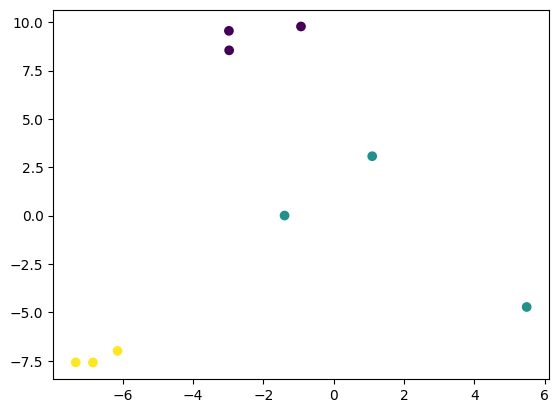

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=9, cluster_std=[1.0, 3.5, 0.5], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c =y);

### 1.1 Define means

In [3]:
#define number of cluster (use domain knowledge or elbow rule)
k = 3

#get m and n
m, n = X.shape

#initialize K number of gaussian distribution

#first, initialize mean
random_row = np.random.randint(low=0, high=m, size=k)
mean = np.array([X[idx,:] for idx in random_row ]).T
print("X: ", X)
print("Mean: ", mean)  #shape: n, k  (mean for each feature for each cluster)

X:  [[ 5.48674679e+00 -4.72331117e+00]
 [-2.97867201e+00  9.55684617e+00]
 [ 1.09496992e+00  3.07303535e+00]
 [-9.29984808e-01  9.78172086e+00]
 [-7.33363923e+00 -7.58626144e+00]
 [-6.14680281e+00 -6.99299774e+00]
 [-1.39733358e+00  5.16333160e-03]
 [-2.97261532e+00  8.54855637e+00]
 [-6.84586309e+00 -7.59248369e+00]]
Mean:  [[-1.39733358e+00 -6.14680281e+00 -7.33363923e+00]
 [ 5.16333160e-03 -6.99299774e+00 -7.58626144e+00]]


### 1.2 Define covariance

In [4]:
#initialize covariance (std for multi-dimension)
cov = np.array([np.cov(X.T) for _ in range (k)])
print("Cov: ", cov) #shape: k, n, n (covriance matrix (n x n) for each cluster)

Cov:  [[[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]]


For those who forget about covariance matrix, 

$$\text{cov}(a) = \text{var}(a) = \sum_i^m \frac{(a^i - \mu)^2}{m}$$

$$\text{cov}(a, b) = \sum_i^m \frac{(a^i - \mu)(b^i - \mu)}{m}$$

### 1.3 Define pi

In [5]:
#initialize the weights (here we called pi)
pi = np.full((k, ), fill_value=1/k) #simply use 1/k for pi
print("PI (weights; must add up to 1): ", pi)  #shape: (k, ) - similar to p(y) of each cluster

PI (weights; must add up to 1):  [0.33333333 0.33333333 0.33333333]


### 1.4 Define responsibilities

In [6]:
#initialize the responsiblities (likelihood)
r = np.full(shape=(m, k), fill_value=1/k)
print("Responsilibities (likelihood - add up to 1): ", r) #shape: (m, k) - the likelihood of each sample belonging to each cluster

Responsilibities (likelihood - add up to 1):  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


## Step 2: EM-step

Repeat until converged:

   1. *E-step*: for each sample $\mathbf{x}^{(i)}$, evaluate responsibilities $r^{(i)}_{c}$ for every data point $\mathbf{x}^{(i)}$ using 

$$ r^{(i)}_{c} = \frac{\pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}$$

   2. *M-step*: for each cluster, update the gaussian distribution of each cluster, i.e., restimate parameters $\pi^{(c)}, \mu^{(c)}, \Sigma^{(c)}, N^{(c)}$ using the updated responsibilites $r^{(i)}_{c}$.

$$N^{(c)} = \sum\limits_{i=1}^{m}r^{(i)}_c$$

$$ \mu^{(c)}_\text{new} = \frac{1}{N^{(c)}} \sum\limits_{i=1}^{m}r^{(i)}_{c}\mathbf{x}^{(i)}$$

$$ \Sigma^{(c)}_\text{new} = \frac{1}{N^{(c)}} \sum\limits_{i=1}^{m}r^{(i)}_{c}(\mathbf{x}^{(i)} - \mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T$$

$$ \pi^{(c)}_\text{new} = \frac{N^{(c)}}{m}$$




### 2.1 E-Step

In [7]:
from scipy.stats import multivariate_normal
for i in range(m):
        for c in range(k):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, c], cov=cov[c])
            r[i, c] = pi[c] * xi_pdf  #p(y) * p(x | y)
        r[i] /= np.sum(r[i])  #normalize
        
print("Shape of r: ", r.shape)  #likelihood for each sample for each cluster
print("r: ", r)

Shape of r:  (9, 3)
r:  [[0.84400661 0.10948349 0.0465099 ]
 [0.67145945 0.18427787 0.14426268]
 [0.7732715  0.143172   0.08355649]
 [0.78065746 0.13071049 0.08863205]
 [0.13151509 0.42526555 0.44321936]
 [0.17936309 0.41880079 0.40183612]
 [0.57970857 0.24827633 0.1720151 ]
 [0.65276438 0.1949     0.15233562]
 [0.14707751 0.42495322 0.42796927]]


### 2.2 M-Step

In [8]:
# Find Nc first for latter use, you can think this as normalized factor
Nc = np.sum(r, axis=0)
assert Nc.shape == (k, )
print(Nc)

[4.75982366 2.27983975 1.96033659]


### 2.3 Update Pi

In [9]:
#Update pi
print("Pi (before): ", pi)
pi = Nc / m
assert pi.shape == (k, )
print("Pi (after): ", pi)

Pi (before):  [0.33333333 0.33333333 0.33333333]
Pi (after):  [0.5288693  0.25331553 0.21781518]


### 2.4 Update mean

In [10]:
#Update mean
print("X.T: ", X.T) #(n, m)
print("r: ", r) #(m, k)
print("X.T @ r ", X.T @ r)
print("Nc: ", Nc)
print("Mean (before) ", mean) #(n, k)
mean =  ( X.T @ r ) / Nc
assert mean.shape == (n, k)
print("Mean (after) ", mean) #(n, k)

X.T:  [[ 5.48674679e+00 -2.97867201e+00  1.09496992e+00 -9.29984808e-01
  -7.33363923e+00 -6.14680281e+00 -1.39733358e+00 -2.97261532e+00
  -6.84586309e+00]
 [-4.72331117e+00  9.55684617e+00  3.07303535e+00  9.78172086e+00
  -7.58626144e+00 -6.99299774e+00  5.16333160e-03  8.54855637e+00
  -7.59248369e+00]]
r:  [[0.84400661 0.10948349 0.0465099 ]
 [0.67145945 0.18427787 0.14426268]
 [0.7732715  0.143172   0.08355649]
 [0.78065746 0.13071049 0.08863205]
 [0.13151509 0.42526555 0.44321936]
 [0.17936309 0.41880079 0.40183612]
 [0.57970857 0.24827633 0.1720151 ]
 [0.65276438 0.1949     0.15233562]
 [0.14707751 0.42495322 0.42796927]]
X.T @ r  [[-3.07282733 -9.44147402 -9.50889278]
 [14.65750205 -4.7513667  -5.83586731]]
Nc:  [4.75982366 2.27983975 1.96033659]
Mean (before)  [[-1.39733358e+00 -6.14680281e+00 -7.33363923e+00]
 [ 5.16333160e-03 -6.99299774e+00 -7.58626144e+00]]
Mean (after)  [[-0.64557588 -4.14128845 -4.85064291]
 [ 3.07942123 -2.08407924 -2.97697208]]


### 2.5 Update covariance

In [11]:
print("Cov (before) ", cov) #(n, k)

#covariance (also called Sigma)
for c in range(k):
    for i in range(m):
        X_mean = (X[i]-mean[:, c]).reshape(-1, 1)
        cov[c] += r[i, c] * (X_mean @ X_mean.T)
    cov[c] /= Nc[c]
assert cov.shape == (k, n, n)

print("Cov (after) ", cov) #(n, k)

Cov (before)  [[[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]]
Cov (after)  [[[15.89840478 -4.32093459]
  [-4.32093459 51.74583404]]

 [[19.29089449 17.4159892 ]
  [17.4159892  71.79771663]]

 [[17.61841975 18.12780574]
  [18.12780574 73.37236612]]]


## Step 3: Predict

In [12]:
#assume you finish repeating step 2
#get preds
yhat = np.argmax(r, axis=1)
print(yhat)

[0 0 0 0 2 1 0 0 2]


## Putting everything together

Text(0.5, 1.0, 'Final')

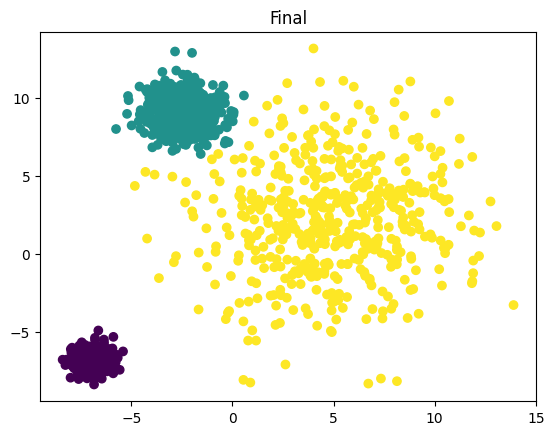

In [13]:
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import math

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

#define basic params
m, n = X.shape
K = 3
max_iter = 20

#==initialization==

#responsibliity
r = np.full(shape=(m, K), fill_value=1/K)

#pi
pi = np.full((K, ), fill_value=1/K) #simply use 1/k for pi

#mean
random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)

#covariance
cov = np.array([np.cov(X.T) for _ in range (K)])

for iteration in range(max_iter):
    
    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for c in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, c], cov=cov[c])
            r[i, c] = pi[c] * xi_pdf
        r[i] /= np.sum(r[i])
    
    #===M-Step====
    # Find NK first for latter use
    Nc = np.sum(r, axis=0)
    assert Nc.shape == (K, )
    
    #PI
    pi = Nc / m
    assert pi.shape == (K, )
    
    #mean
    mean =  ( X.T @ r ) / Nc
    assert mean.shape == (n, K)
    
    #covariance (also called Sigma)
    cov = np.zeros((K, n, n))
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= Nc[k]
    assert cov.shape == (K, n, n)
        

#get preds
yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")

## 2. Sklearn

Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for *density estimation*.  That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

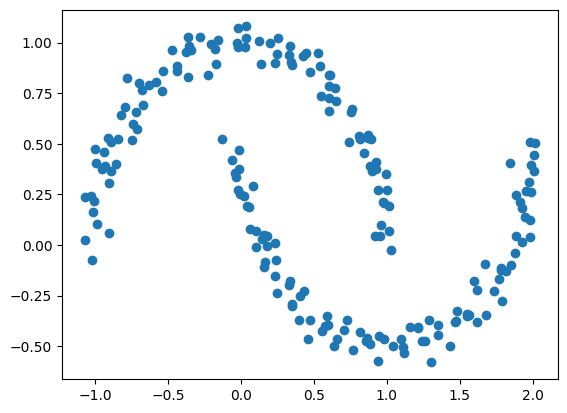

In [14]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

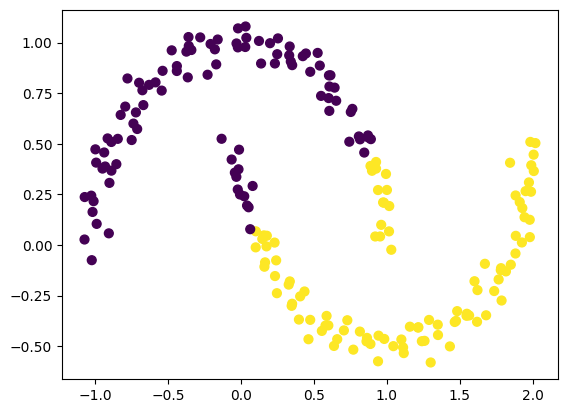

In [15]:
from sklearn.mixture import GaussianMixture as GMM
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
pred = gmm2.fit(Xmoon).predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=pred, s=40, cmap='viridis')

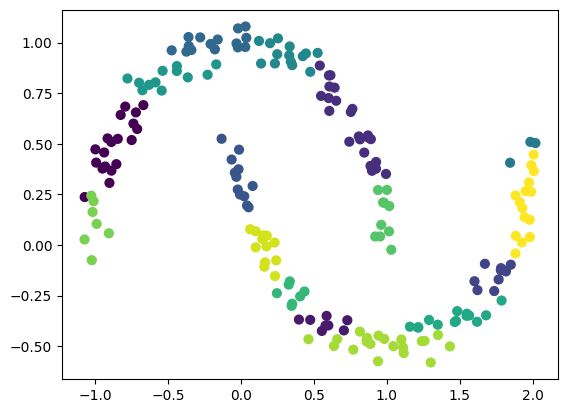

In [16]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
pred = gmm16.fit(Xmoon).predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=pred, s=40, cmap='viridis')

Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall *distribution* of the input data.
This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input.
For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

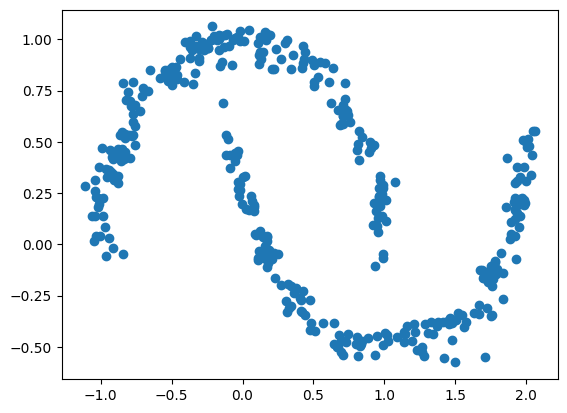

In [17]:
Xnew, _ = gmm16.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])

### When to use GMM

Pros:
    - Address the limitations of K-means
    - Can be used to generate data, since we know $P(x | y)$

Cons:
    - Just like K-mean, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

## Workshop

1. How GMM differs from K-means for centroid intialization?
2. In GMM, how do we initialize means?
3. In GMM, what's the shape of means?
4. In above code, we get 6 numbers in the mean;  what these numbers describe?
5. In GMM, how do we initialize covariance matrix?
6. In GMM, what's the shape of covariance matrix?
7. In above code, we get 12 numbers in covariance matrix; what these numbers describe?
8. What $\pi$ describes?
9.  What's the shape of $\pi$? 
10. Does $\pi$ needs to sum to 1?
11. What responsibilities ($r$) describes? 
12. What's the shape of $r$?
13. In GMM, what is the primary objective function?  
14. Though Chaky did not talk about it, what do you think are some sensible stopping criteria?